# Comparing allelic imbalance test results between EpiSCs in bulk RNA-seq and pseudo-bulk scRNA

### Figure 6D

In [14]:
.libPaths( c( .libPaths(), "/home/114/vp4925/R/x86_64-pc-linux-gnu-library/4.3") ) 
# Loading libraries
suppressPackageStartupMessages({
  library(ggplot2)
  library(ggsci)
  library(ggthemes)
  library(ggpointdensity)
  library(ggpubr)
  library(gridExtra)
  library(tibble)
  library(openxlsx)
  library(dplyr)
  library(reshape2)
  library(ggVennDiagram)
  library(wesanderson)
})

In [8]:
#Loading data
cell_types <- c("Deep layer neurons", "Gliogenic progenitor cells", "Hippocampal neurons", "Inhibitory neurons", 
                "Intermediate neuronal prog", "Neurogenic progenitor cells", "Oligodendrocyte prog", "Preplate neurons")
res_dir <- "/g/data/zk16/veronika/projects/vierbuct/github/data/bbtest_res_ASPEN/updated/"

spret_bb_test <- list()
spret_bb_test_rdc <- list()
for (i in 1:length(cell_types)){
    spret_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_SPRET_exons_dispshrunk_updated.xlsx"), sheet = i, rowNames = T)
    spret_bb_test[[i]]$cell_type <- cell_types[i]
    spret_bb_test[[i]]$strain <- "SpretB6"
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 1, 12, spret_bb_test[[i]]$log2FC)
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 0, -12, spret_bb_test[[i]]$log2FC)
    spret_bb_test_rdc[[i]] <- spret_bb_test[[i]][,c("fdr_shrunk", "log2FC", "cell_type", "strain")]
}




In [11]:
#removing low-abundant cell types - Hippocampal neurons, Inhibitory neurons
spret_bb_test_rdc <- spret_bb_test_rdc[-c(3,4)]

In [16]:

spret_b6_olaps <- list(
  "Cortical neurons" = rownames(spret_bb_test_rdc[[1]])[spret_bb_test_rdc[[1]]$fdr < 0.05], 
  "Astrocyte progenitor" = rownames(spret_bb_test_rdc[[2]])[spret_bb_test_rdc[[2]]$fdr < 0.05], 
  "IPCs" = rownames(spret_bb_test_rdc[[3]])[spret_bb_test_rdc[[3]]$fdr < 0.05],
  "RGCs" = rownames(spret_bb_test_rdc[[4]])[spret_bb_test_rdc[[4]]$fdr < 0.05],
  "OPCs" =  rownames(spret_bb_test_rdc[[5]])[spret_bb_test_rdc[[5]]$fdr < 0.05],
  "Preplate neurons" = rownames(spret_bb_test_rdc[[6]])[spret_bb_test_rdc[[6]]$fdr < 0.05]
)


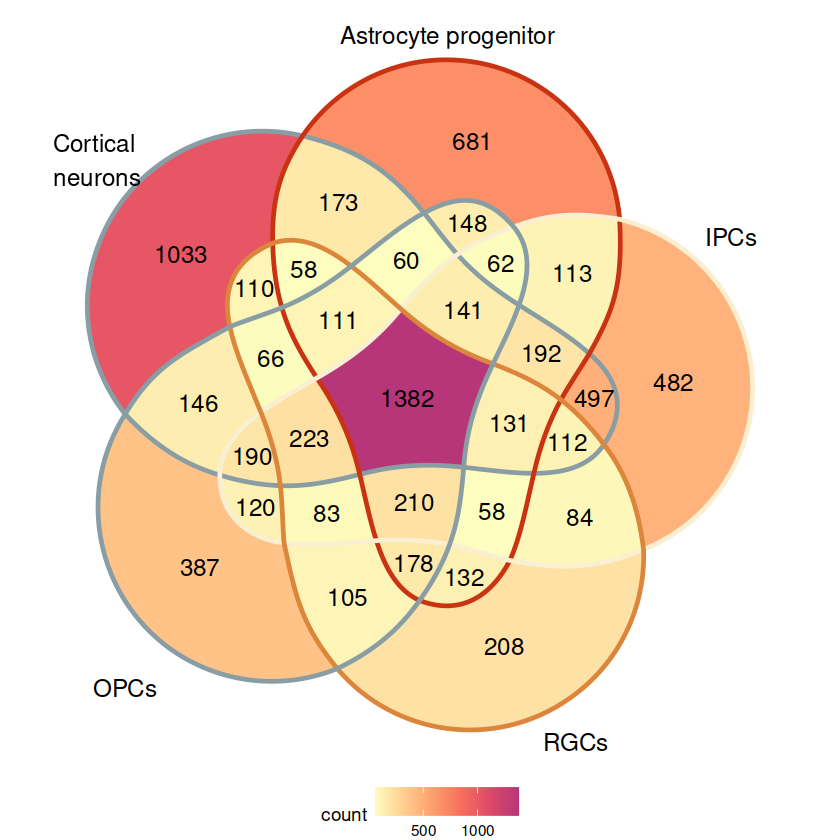

In [22]:
options(repr.plot.width = 7, repr.plot.height = 7)
ggVennDiagram(
  spret_b6_olaps[-6], label_alpha = 0,  
  category.names = c("Cortical\n neurons",
                     "Astrocyte progenitor",
                     "IPCs", 
                     "RGCs", 
                     "OPCs"), 
  label = "count", set_size = 5, label_size = 5,
) +
  scale_fill_viridis_c(option = "magma", direction = -1,  begin = 0.5, end = 1) + 
  #scale_fill_distiller(palette = "YlOrRd", direction = 1) + 
  scale_color_manual(values = c(wes_palette("Royal1"), wes_palette("Royal1"))) +
  theme(legend.position = "bottom")